# Lab 1

<b>Class:</b> MSDS 7331 Data Mining
<br> <b>Dataset:</b> Belk Endowment Educational Attainment Data 

<h1 style="font-size:150%;"> Teammates </h1>
Maryam Shahini
<br> Murtada Shubbar
<br> Michael Toolin
<br> Steven Millett

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

import re

%matplotlib inline

# 

In [12]:
#
# The Machine Learning Date Set is being used through out this analysis.  The _ML suffix is removed to less name space size
#
# Load Full Public School Data Frames for each year
#
school_data = pd.read_csv('./Data/2017/machine Learning Datasets/PublicSchools2017_ML.csv', low_memory=False)

(2426, 325)
(2432, 357)
(2430, 333)
(2443, 334)


In [13]:
print(school_data.shape)

(2443, 334)


# Business Understanding 

The North Carolina Educational data set contains report cards on a variety of schools in the North Carolina school system. These include public schools, charter schools and alternative schools.  This data describes the school system at multiple levels and grades the schools on a number of different metrics.  The number of different metrics available provide an opportunity to measure schools on all these different performance areas.  One area to look closely into is school and student performance.  These specific metrics can provide some insight into indivdual schools or schools in parts of the state that are underperforming where additional resources might help.  North Carolina ranks 40th in the nation in eduction and ranks 45th in funding.[1] The lack of financial resources places a premium on deciding where to use the available money. For example, how are districts with primarliy minority students fairing compared to others? Where schools are underperforming, how experienced are teachers?  Using this data to identify underperforming areas, can we predict if higher funding correlates to better performance in school or on SAT scores. Also, are college admissions in any way connected to better funded schools.  A seperate area to examine would be the safety of neighborhoods in comparison to school performance.  This information could be used in other areas of local government as well.

###citation: Drew J., The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools, (2018), GitHub repository, https://github.com/jakemdrew/EducationDataNC

[1] (source: https://www.edweek.org/ew/collections/quality-counts-2018-state-grades/highlight-reports/2018/01/17/north-carolina.html/)

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

# Data Meaning Type 

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [14]:
print(school_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Columns: 334 entries, student_num to unit_code
dtypes: float64(290), int64(44)
memory usage: 6.2 MB
None


In [15]:
school_data.head()

,student_num,lea_avg_student_num,st_avg_student_num,00_Size,02_Size,03_Size,04_Size,05_Size,Math I_Size,lea_total_expense_num,...,Math SPG Grade_C,Math SPG Grade_D,Math SPG Grade_F,EVAAS Growth Status_Met,EVAAS Growth Status_NotMet,State Gap Compared_Y,Byod_Yes,_1_to_1_access_Yes,SRC_devices_sent_home_Yes,unit_code
0,152.0,996.0,853.0,0.0,0.0,0.0,0.0,0.0,21.0,8588.32,...,0,0,0,1,0,0,0,1,1,10303
1,575.0,528.0,490.0,21.0,19.0,22.0,24.0,28.0,0.0,8588.32,...,0,0,0,0,0,0,0,0,0,10304
2,611.0,528.0,490.0,19.0,20.0,19.0,27.0,26.0,0.0,8588.32,...,1,0,0,0,0,0,0,0,0,10308
3,742.0,706.0,629.0,0.0,0.0,0.0,0.0,0.0,26.0,8588.32,...,0,0,1,1,0,0,0,0,0,10310
4,701.0,528.0,490.0,20.0,21.0,22.0,24.0,23.0,0.0,8588.32,...,1,0,0,0,1,0,0,0,0,10312


In [ ]:
#scatter_matrix(school_data)

In [16]:
school_data.shape

(2443, 334)

# Data Quality

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

# Simple Statistics

Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

In [17]:
print(school_data.describe())

       student_num  lea_avg_student_num  st_avg_student_num      00_Size  \
count  2443.000000          2443.000000         2443.000000  2443.000000   
mean    584.173966           584.245600          586.074089     9.969709   
std     386.933479           271.986506          150.150219     9.588669   
min       5.000000             5.000000          278.000000     0.000000   
25%     337.500000           427.500000          490.000000     0.000000   
50%     512.000000           529.000000          490.000000    14.000000   
75%     725.000000           683.000000          629.000000    19.000000   
max    2974.000000          1852.000000          853.000000    27.000000   

           02_Size      03_Size      04_Size      05_Size  Math I_Size  \
count  2443.000000  2443.000000  2443.000000  2443.000000  2443.000000   
mean     10.153090    10.067131    11.209578    11.152272     8.808023   
std       9.756678     9.756138    10.842040    11.173440    11.225975   
min       0.000000 

# Visualize Attributes

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [68]:
def prefixsearch(search_string, missing_value ,start_of_search_string,end_of_search_string):
    if re.search(end_of_search_string, search_string):
        return re.search('('+ start_of_search_string +'\S*)(?='+ end_of_search_string +')',search_string).group(0)
    else:
        return missing_value



In [69]:
teacher_temp_col = [col for col in school_data.columns if 'tchyrs' in col]
teacher_columns = school_data[teacher_temp_col].melt(var_name='col',value_name='values')

teacher_columns['year'] = teacher_columns['col'].apply(lambda name: re.search('(?<=tchyrs_)\S*(?=_)',name).group(0))
teacher_columns['region'] = teacher_columns['col'].apply(lambda name: prefixsearch(name, "Sch", '^\S*','_tch'))



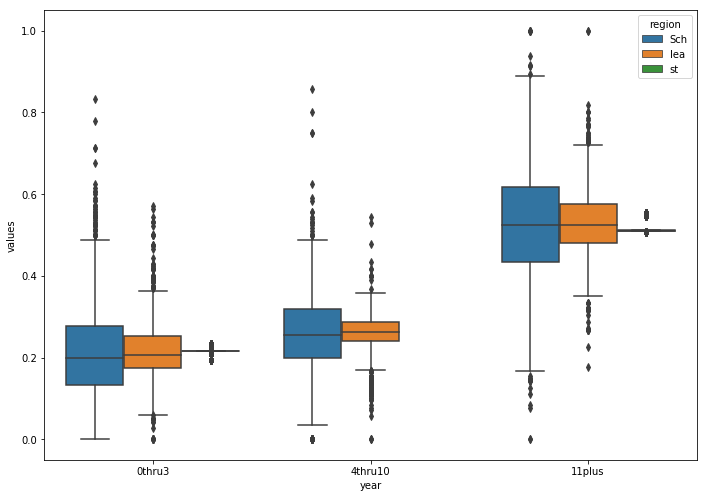

In [70]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,data=teacher_columns,x='year', y='values', hue='region')

# Makeup of teachers in classrooms
In the graph above we are looking at the percentage of teachers that makeup a classroom based on their years of tenure.

In [84]:
sex_temp_col = school_data.filter(regex=('[Mm]alePct')).columns
sex_teacher_columns = school_data[sex_temp_col].melt(var_name='col',value_name='values')

sex_teacher_columns['race'] = sex_teacher_columns['col'].apply(lambda name: prefixsearch(name, "", '^','Male|Female'))
sex_teacher_columns['sex'] = sex_teacher_columns['col'].apply(lambda name: 'Female' if re.search('Female',name) else 'Male')



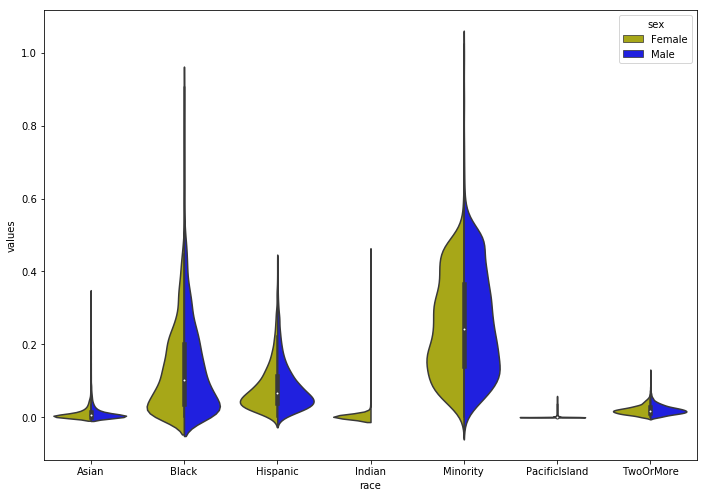

In [87]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='race',y='values',hue='sex',data=sex_teacher_columns,split=True,palette={"Male": "b", "Female": "y"})


# Makeup of minorities in classrooms

In the graph above we are looking at the percentage of minorities that makeup a classroom as represented with a violin plot. Each half of the violin represents the different sexual make-up of each race.


# Explore Joint Attributes

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

# Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

# New Features

Are there other features that could be added to the data or created from existing features? Which ones?

# Exceptional Work

You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.